# Table of Contents.

 1. Data Import & Setup.
 2. Considering Security Implications.
    - Taking anonimization measures.
 3. Comparing customer behavior in greographic areas.
 4. Creating an exclusion flag for low-activity customers.
 5. Creating a customer profiling variables.
 6. Creating a combined customer profile label.
 7. Aggregating Measures
 8. Comparing customer profiles with regions and departments.
 9. Exporting data.
 10. Answering Key Question with Visualizations.

## step 1
## Import Libraries

In [1]:
#Step 1
# Importing Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#shortcut to data files
path = r'C:\Users\Sreelaya Narla\Desktop\PYTHON\2025 Instacart Basket Analysis'

In [3]:
# Importing Dataframe
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_exercise_4_9.pkl'))

In [4]:
# Verify the imported dataframe
df.head(10)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,First Name,Last Name,Gender,State,Age,Date Joined,number of dependents,Family Status,Income,merging_status
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
5,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
6,2398795,1,2,3,7,15.0,10258,2,0,Pistachios,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
7,2398795,1,2,3,7,15.0,12427,3,1,Original Beef Jerky,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
8,2398795,1,2,3,7,15.0,13176,4,0,Bag of Organic Bananas,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
9,2398795,1,2,3,7,15.0,26088,5,1,Aged White Cheddar Popcorn,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


## step 2

In [5]:
## Step.2 Considering security implications
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 34 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 object  
 2   order_number            int64   
 3   orders_day_of_week      int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   product_id              int64   
 7   add_to_cart_order       int64   
 8   reordered               int64   
 9   product_name            object  
 10  aisle_id                int64   
 11  department_id           int64   
 12  prices                  float64 
 13  merge_status            category
 14  price_range_loc         object  
 15  busiest_day             object  
 16  busiest_days_summary    object  
 17  busiest_period_of_day   object  
 18  max_order               int64   
 19  loyalty_flag            object  
 20  average_spend           float64 
 21  spende

In [6]:
## Creating a data frame from taking anonimation measures
df_anonymized = df.copy()

In [7]:
## Droping sensitive columns (PII)
df_anonymized = df_anonymized.drop(columns=['First Name', 'Last Name','user_id'])

In [8]:
## Checking
df_anonymized.head()

,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,...,Customer_frequency,frequency_flag,Gender,State,Age,Date Joined,number of dependents,Family Status,Income,merging_status
0,2539329,1,2,8,NaN,196,1,0,Soda,77,...,20.5,Non_frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2539329,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,...,20.5,Non_frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2539329,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,...,20.5,Non_frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2539329,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,...,20.5,Non_frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423,both
4,2539329,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,...,20.5,Non_frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423,both


## step 3

In [9]:
## Step.3 Comparing customer behavior in greographic areas
##Creating a Region Column based on "State"

In [10]:
#Defining regions
##Region 1: Northeast
northeast = [
    'Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut',
    'New York', 'Pennsylvania', 'New Jersey']

# Region 2: Midwest
midwest = [
    'Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio',
    'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

# Region 3: South
south = [
    'Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia',
    'North Carolina', 'South Carolina', 'Georgia', 'Florida',
    'Kentucky', 'Tennessee', 'Mississippi', 'Alabama',
    'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

# Region 4: West
west = [
    'Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico',
    'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [11]:
## Adding region column

def assign_region(State):
    if State in northeast:
        return 'Northeast'
    elif State in midwest:
        return 'Midwest'
    elif State in south:
        return 'South'
    elif State in west:
        return 'West'
    else:
        return 'Other'

df_anonymized['region'] = df_anonymized['State'].apply(assign_region)

In [12]:
df_anonymized.head()

,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,...,frequency_flag,Gender,State,Age,Date Joined,number of dependents,Family Status,Income,merging_status,region
0,2539329,1,2,8,NaN,196,1,0,Soda,77,...,Non_frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
1,2539329,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,...,Non_frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
2,2539329,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,...,Non_frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
3,2539329,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,...,Non_frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
4,2539329,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,...,Non_frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South


In [13]:
## Crossing variables
region_spending = pd.crosstab(df_anonymized['region'], df_anonymized['spender_flag'])

In [14]:
## Checking
region_spending.head

<bound method NDFrame.head of spender_flag  High_spender  Low_spender
region                                 
Midwest              29265      7568060
Northeast            18642      5704094
South                40579     10751306
West                 31223      8261690>

#### observation
Interpretation:
All regions have many more low spenders than high spenders.

The South has the highest number of both high and low spenders, likely because it has the most customers overall.

The Northeast has the fewest high spenders, which could reflect smaller customer base or different shopping behavior.

This cross-tabulation is useful to identify regional trends in spending.

In [15]:
# compare percentages of high spenders per region
region_spending_pct = pd.crosstab(df_anonymized['region'], df_anonymized['spender_flag'], normalize='index') * 100
print(region_spending_pct)


spender_flag  High_spender  Low_spender
region                                 
Midwest           0.385201    99.614799
Northeast         0.325753    99.674247
South             0.376014    99.623986
West              0.376502    99.623498


## step 4

In [16]:
## Step 4. Creating an exclusion flag for low-activity customers (>5 orders)
## low-activity flag customers
df_anonymized['exclusion_flag'] = df_anonymized['max_order'] < 5

In [17]:
## Checking
df_anonymized['exclusion_flag'].value_counts()

exclusion_flag
False    30964564
True      1440295
Name: count, dtype: int64

In [18]:
#Exclude low-activity customers from the dataset
df_active_anonymized = df_anonymized[df_anonymized['exclusion_flag'] == False]

In [19]:
## cheking
df_active_anonymized.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30964564 entries, 0 to 32404858
Data columns (total 33 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   order_number            int64   
 2   orders_day_of_week      int64   
 3   order_hour_of_day       int64   
 4   days_since_prior_order  float64 
 5   product_id              int64   
 6   add_to_cart_order       int64   
 7   reordered               int64   
 8   product_name            object  
 9   aisle_id                int64   
 10  department_id           int64   
 11  prices                  float64 
 12  merge_status            category
 13  price_range_loc         object  
 14  busiest_day             object  
 15  busiest_days_summary    object  
 16  busiest_period_of_day   object  
 17  max_order               int64   
 18  loyalty_flag            object  
 19  average_spend           float64 
 20  spender_flag            object  
 21  Customer_fr

In [20]:
# Export the updated dataframe
df_active_anonymized.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'High_activity_Customers.pkl'))

## step 5

In [21]:
##Step.5  Creating a profiling variable based on 'age','income',certain goods in the 'department_id',' number of dependants'
## 'orders_day_of_week' and 'order_hour_of_day'

In [ ]:
## Checking age unique values to determine profiles
sorted(df_active_anonymized['Age'].unique())

In [23]:
#Creating a sample of the dataframe
sampled_df = df_active_anonymized.sample(n=100000, random_state=1)

In [24]:
##Defining profiles by age
def assign_age_group(Age):
    if Age < 18:
        return 'Teen'
    elif 18 <= Age <= 29:
        return 'Young Adult'
    elif 30 <= Age <= 44:
        return 'Adult'
    elif 45 <= Age <= 59:
        return 'Middle Aged'
    else:
        return 'Senior'

In [25]:
## applying
sampled_df['age_group'] = sampled_df['Age'].apply(assign_age_group)

In [26]:
## Checking output
sampled_df['age_group'].value_counts()

age_group
Senior         34044
Middle Aged    23684
Adult          23532
Young Adult    18740
Name: count, dtype: int64

In [ ]:
## Checking income unique values to determine profiles
sorted(sampled_df['Income'].unique())

In [28]:
print("Minimum income:", sampled_df['Income'].min())
print("Maximum income:", sampled_df['Income'].max())

Minimum income: 25991
Maximum income: 593901


In [29]:
##defining profiles
def assign_income_group(Income):
    if Income < 50000:
        return 'Low-Income'
    elif 50000 <= Income < 100000:
        return 'Midle-Income'
    elif 100000 <= Income < 150000:
        return 'Upper_Income'
    elif 150000 <= Income < 250000:
        return 'High-Income'
    else:
        return 'Very High-Income'

In [30]:
## applying
sampled_df['income_group'] = sampled_df['Income'].apply(assign_income_group)

In [31]:
## checking output
sampled_df['income_group'].value_counts()

income_group
Midle-Income        43292
Upper_Income        33402
High-Income         12012
Low-Income          10720
Very High-Income      574
Name: count, dtype: int64

In [32]:
## Defining profiles by dependants
def assign_profile(row):
    if row['number of dependents'] == 0:
        return 'Single Adult'
    else:
        return 'Parent'

In [33]:
## Applying
sampled_df['parenting_status'] = sampled_df.apply(assign_profile, axis=1)

In [34]:
##checking output
sampled_df['parenting_status'].value_counts()

parenting_status
Parent          75112
Single Adult    24888
Name: count, dtype: int64

## step 6

In [35]:
##step 6
## Creating visualizations for region, age groups, income,and parenting

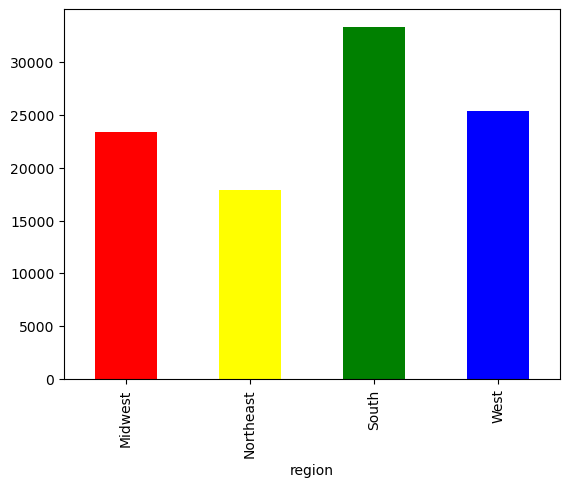

In [36]:
##Creating Bar Chart for region
bar_region = sampled_df['region'].value_counts().sort_index().plot.bar(color=['red','yellow','green','blue'])

In [37]:
#exporting
bar_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region.png'))

C:\Users\Sreelaya Narla\AppData\Local\Temp\ipykernel_8708\3582940747.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=profile_distribution, x='Profile', y='Count', palette='Set3')


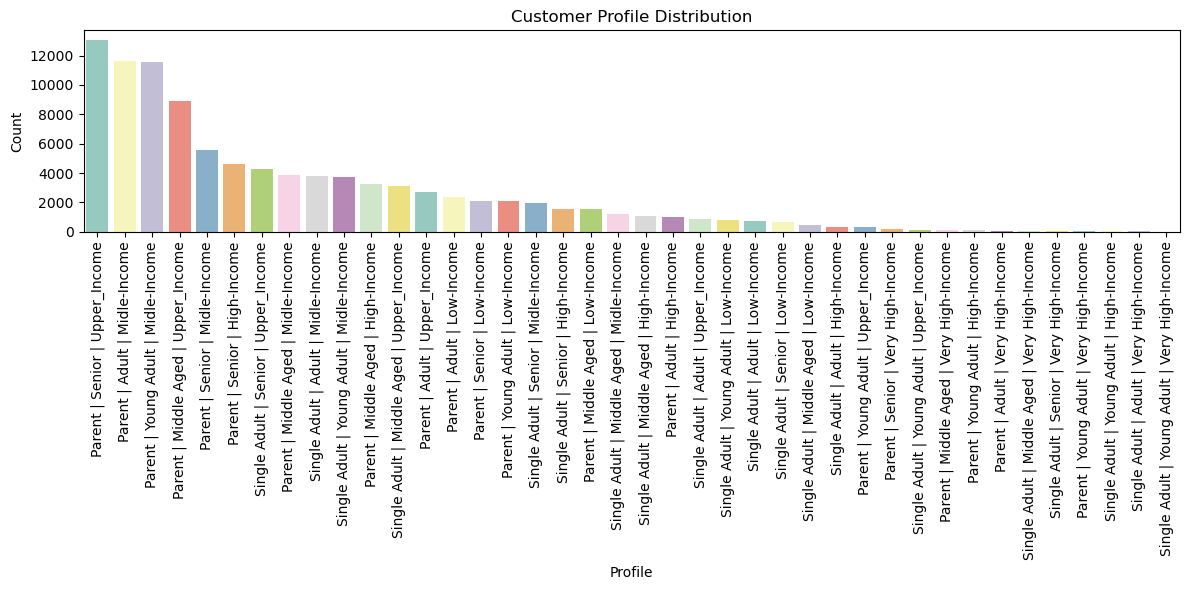

In [38]:
## Step6.Creating a combined profile label
sampled_df['combined_profile'] = sampled_df['parenting_status'] + ' | ' + sampled_df['age_group'] + ' | ' + sampled_df['income_group']

## Counting occurrences
profile_distribution = sampled_df['combined_profile'].value_counts().reset_index()
profile_distribution.columns = ['Profile', 'Count']
## Creatin bar chart
customer_profile_distribution = plt.figure(figsize=(12,6))
sns.barplot(data=profile_distribution, x='Profile', y='Count', palette='Set3')
plt.xticks(rotation=90)
plt.title('Customer Profile Distribution')
plt.tight_layout()
plt.show()

In [39]:
## Exporting the chart outside of Jupyter in the form of an image file.
customer_profile_distribution.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'cust_pro_dist.png'))

<Axes: xlabel='Age', ylabel='Income'>

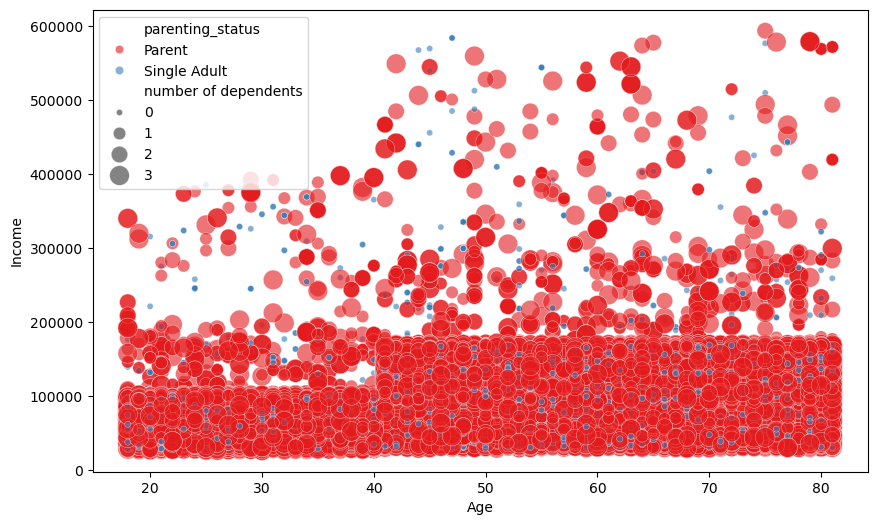

In [40]:
# Scatterplot including age, income, and parenting status
sct_parenting_age_income = plt.figure(figsize=(10, 6))
sns.scatterplot(data=sampled_df,
                x='Age',
                y='Income', 
                hue='parenting_status',
                size='number of dependents',
                sizes=(20, 200),
                alpha=0.6, 
                palette='Set1')

In [41]:
## Exporting the chart outside of Jupyter in the form of an image file.
sct_parenting_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'sct_parenting_age_income.png'))

In [42]:
## Creating Viz for orders by day

C:\Users\Sreelaya Narla\AppData\Local\Temp\ipykernel_8708\1107172781.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=sampled_df, x='day_of_week', order=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], palette='pastel')


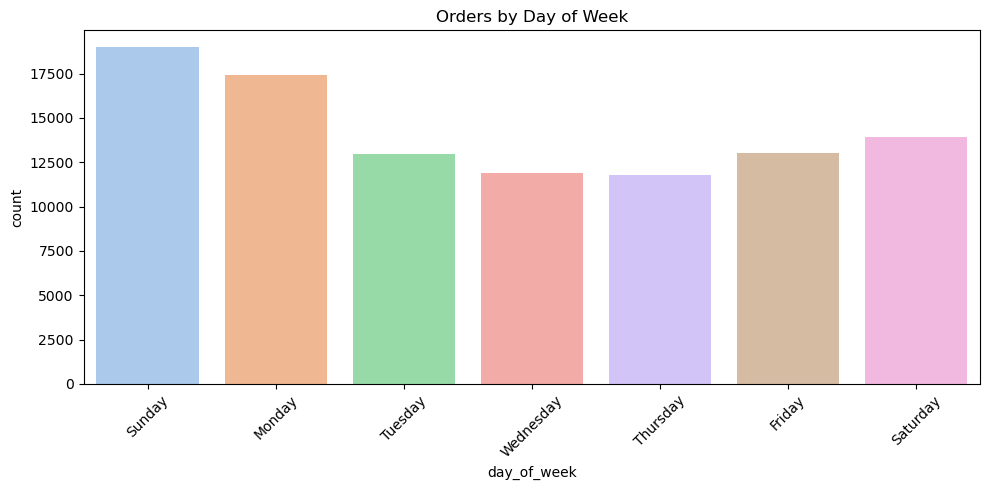

In [45]:
dow_map = {
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
    4: 'Thursday', 5: 'Friday', 6: 'Saturday'
}
sampled_df['day_of_week'] = sampled_df['orders_day_of_week'].map(dow_map)

# Countplot
import seaborn as sns
bar_orders_dow = plt.figure(figsize=(10, 5))
sns.countplot(data=sampled_df, x='day_of_week', order=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], palette='pastel')
plt.title('Orders by Day of Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [46]:
## Exporting the chart outside of Jupyter in the form of an image file.
bar_orders_dow.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_day_of_week.png'))

In [47]:
## Creating viz for price range frecuency
df['price_range_loc'].value_counts()

price_range_loc
Mid-range product     21865987
Low-range product     10126321
High-range product      412551
Name: count, dtype: int64

In [48]:
# Normalizing the value counts to get proportions
price_range_freq = sampled_df['price_range_loc'].value_counts(normalize=True).reset_index()
price_range_freq.columns = ['price_range', 'frequency']

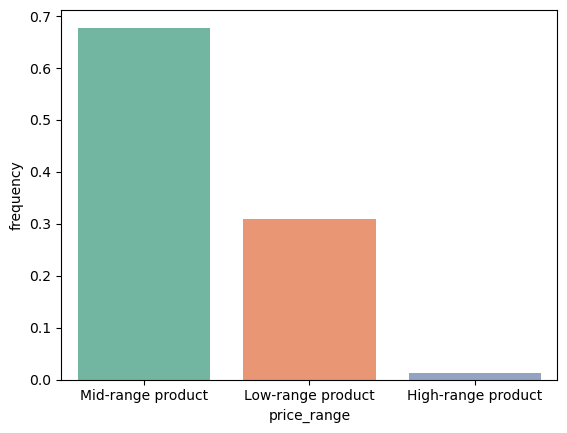

In [49]:
## Creating the bar
frecuency_price_range_tag = sns.barplot(data=price_range_freq,x='price_range', y='frequency',hue='price_range',palette='Set2',legend=False)

In [50]:
## Exporting the chart outside of Jupyter in the form of an image file.
frecuency_price_range_tag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'frecuency_price_range.png'))

In [52]:
#create a cross tab
crosstab_loyalty_age = pd.crosstab(sampled_df['age_group'], sampled_df['loyalty_flag'])

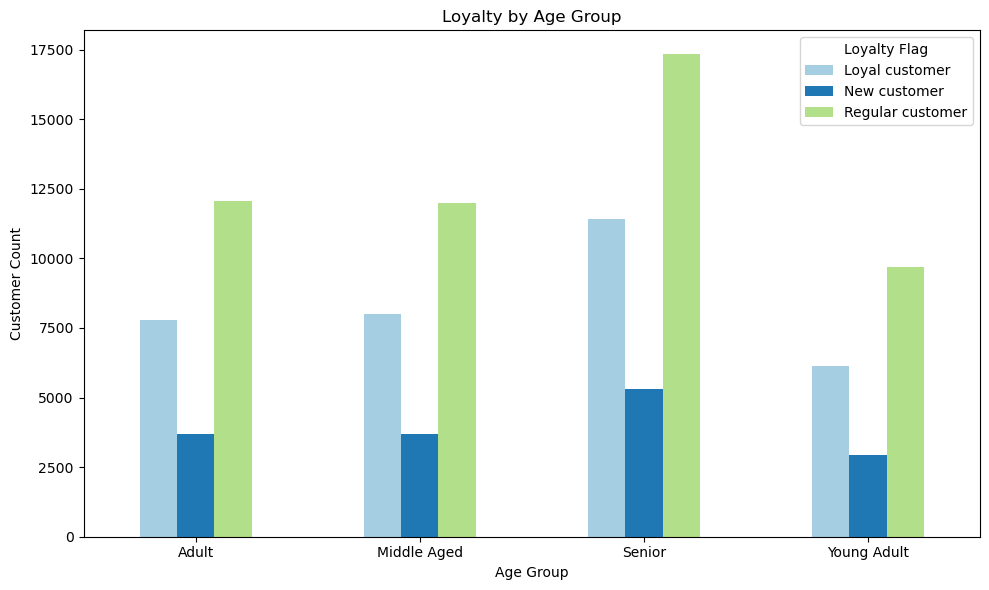

In [53]:
# Create the bar plot
bar_chart = crosstab_loyalty_age.plot.bar(figsize=(10,6), color=['#a6cee3', '#1f78b4', '#b2df8a'])
plt.title('Loyalty by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Customer Count')
plt.xticks(rotation=0)
plt.legend(title='Loyalty Flag')
plt.tight_layout()
plt.show()

In [55]:
#exporting
bar_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_by_age_group.png'))

## step 7

In [56]:
## Step 7 aggregating the max,and mean.
agg_stats = sampled_df.groupby('combined_profile').agg({
    'age_group': ['max', 'min'],
    'income_group': ['max', 'min'],
    'number of dependents': ['max','min'] }).reset_index()

In [57]:
agg_stats

combined_profile    age_group               \
                                                           max          min   
0                    Parent | Adult | High-Income        Adult        Adult   
1                     Parent | Adult | Low-Income        Adult        Adult   
2                   Parent | Adult | Midle-Income        Adult        Adult   
3                   Parent | Adult | Upper_Income        Adult        Adult   
4               Parent | Adult | Very High-Income        Adult        Adult   
5              Parent | Middle Aged | High-Income  Middle Aged  Middle Aged   
6               Parent | Middle Aged | Low-Income  Middle Aged  Middle Aged   
7             Parent | Middle Aged | Midle-Income  Middle Aged  Middle Aged   
8             Parent | Middle Aged | Upper_Income  Middle Aged  Middle Aged   
9         Parent | Middle Aged | Very High-Income  Middle Aged  Middle Aged   
10                  Parent | Senior | High-Income       Senior       Senior   
11                   Parent | Senior | Low-Income       Senior       Senior   
12                 Parent | Senior | Midle-Income       Senior       Senior   
13                 Parent | Senior | Upper_Income       Senior       Senior   
14             Parent | Senior | Very High-Income       Senior       Senior   
15             Parent | Young Adult | High-Income  Young Adult  Young Adult   
16              Parent | Young Adult | Low-Income  Young Adult  Young Adult   
17            Parent | Young Adult | Midle-Income  Young Adult  Young Adult   
18            Parent | Young Adult | Upper_Income  Young Adult  Young Adult   
19        Parent | Young Adult | Very High-Income  Young Adult  Young Adult   
20             Single Adult | Adult | High-Income        Adult        Adult   
21              Single Adult | Adult | Low-Income        Adult        Adult   
22            Single Adult | Adult | Midle-Income        Adult        Adult   
23            Single Adult | Adult | Upper_Income        Adult        Adult   
24        Single Adult | Adult | Very High-Income        Adult        Adult   
25       Single Adult | Middle Aged | High-Income  Middle Aged  Middle Aged   
26        Single Adult | Middle Aged | Low-Income  Middle Aged  Middle Aged   
27      Single Adult | Middle Aged | Midle-Income  Middle Aged  Middle Aged   
28      Single Adult | Middle Aged | Upper_Income  Middle Aged  Middle Aged   
29  Single Adult | Middle Aged | Very High-Income  Middle Aged  Middle Aged   
30            Single Adult | Senior | High-Income       Senior       Senior   
31             Single Adult | Senior | Low-Income       Senior       Senior   
32           Single Adult | Senior | Midle-Income       Senior       Senior   
33           Single Adult | Senior | Upper_Income       Senior       Senior   
34       Single Adult | Senior | Very High-Income       Senior       Senior   
35       Single Adult | Young Adult | High-Income  Young Adult  Young Adult   
36        Single Adult | Young Adult | Low-Income  Young Adult  Young Adult   
37      Single Adult | Young Adult | Midle-Income  Young Adult  Young Adult   
38      Single Adult | Young Adult | Upper_Income  Young Adult  Young Adult   
39  Single Adult | Young Adult | Very High-Income  Young Adult  Young Adult   

        income_group                   number of dependents      
                 max               min                  max min  
0        High-Income       High-Income                    3   1  
1         Low-Income        Low-Income                    3   1  
2       Midle-Income      Midle-Income                    3   1  
3       Upper_Income      Upper_Income                    3   1  
4   Very High-Income  Very High-Income                    3   1  
5        High-Income       High-Income                    3   1  
6         Low-Income        Low-Income                    3   1  
7       Midle-Income      Midle-Income                    3   1  
8       Upper_Income      Upper_Income                

## step 8

In [58]:
## Step 8.
##Comparing customer profiles with regions and departments.

In [59]:
# Creating Department dictionary
department_dict = {
    1: 'frozen',
    2: 'other',
    3: 'bakery',
    4: 'produce',
    5: 'alcohol',
    6: 'international',
    7: 'beverages',
    8: 'pets',
    9: 'dry goods pasta',
    10: 'bulk',
    11: 'personal care',
    12: 'meat seafood',
    13: 'pantry',
    14: 'breakfast',
    15: 'canned goods',
    16: 'dairy eggs',
    17: 'household',
    18: 'babies',
    19: 'snacks',
    20: 'deli',
    21: 'missing'}

In [60]:
sampled_df['department_name'] = sampled_df['department_id'].replace(department_dict)

In [61]:
sampled_df.head()

,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,...,Income,merging_status,region,exclusion_flag,age_group,income_group,parenting_status,combined_profile,day_of_week,department_name
18144773,1811841,5,2,21,13.0,44632,2,1,Sparkling Water Grapefruit,115,...,42861,both,South,False,Young Adult,Low-Income,Parent,Parent | Young Adult | Low-Income,Tuesday,beverages
3368362,2353406,20,0,10,30.0,27156,13,0,Organic Black Beans,59,...,167967,both,West,False,Senior,High-Income,Parent,Parent | Senior | High-Income,Sunday,canned goods
1638366,1112446,9,6,13,19.0,21903,24,1,Organic Baby Spinach,123,...,149007,both,Midwest,False,Adult,Upper_Income,Parent,Parent | Adult | Upper_Income,Saturday,produce
20740835,2478192,59,5,10,5.0,17862,2,0,Minced Garlic,81,...,30153,both,South,False,Adult,Low-Income,Parent,Parent | Adult | Low-Income,Friday,canned goods
7917105,2545155,9,6,9,6.0,28204,3,0,Organic Fuji Apple,24,...,85812,both,South,False,Senior,Midle-Income,Parent,Parent | Senior | Midle-Income,Saturday,produce


In [62]:
## grouping
profile_region_dept = sampled_df.groupby(['age_group', 'region', 'department_name']).size().reset_index(name='order_count')

C:\Users\Sreelaya Narla\AppData\Local\Temp\ipykernel_8708\2840924692.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


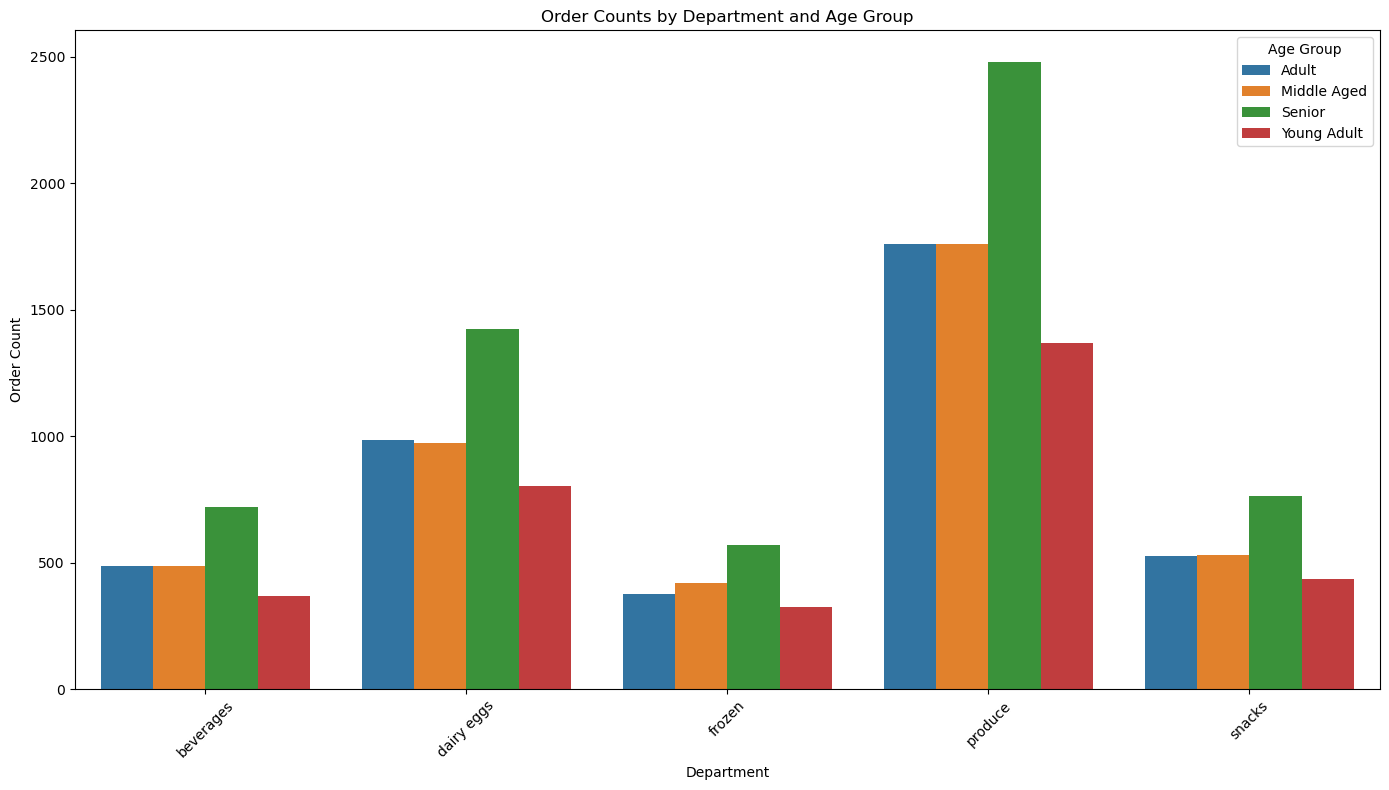

In [63]:
## Creating top departments for comparison.
top_departments = profile_region_dept.groupby('department_name')['order_count'].sum().sort_values(ascending=False).head(5).index
filtered_df = profile_region_dept[profile_region_dept['department_name'].isin(top_departments)]

order_counts_dep_age= plt.figure(figsize=(14,8))
sns.barplot(
    data=filtered_df,
    x='department_name',
    y='order_count',
    hue='age_group',
    ci=None
)
plt.title('Order Counts by Department and Age Group')
plt.xlabel('Department')
plt.ylabel('Order Count')
plt.legend(title='Age Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [64]:
## Exporting the chart outside of Jupyter in the form of an image file.
order_counts_dep_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_counts_dep_age.png'))

C:\Users\Sreelaya Narla\AppData\Local\Temp\ipykernel_8708\2916909341.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


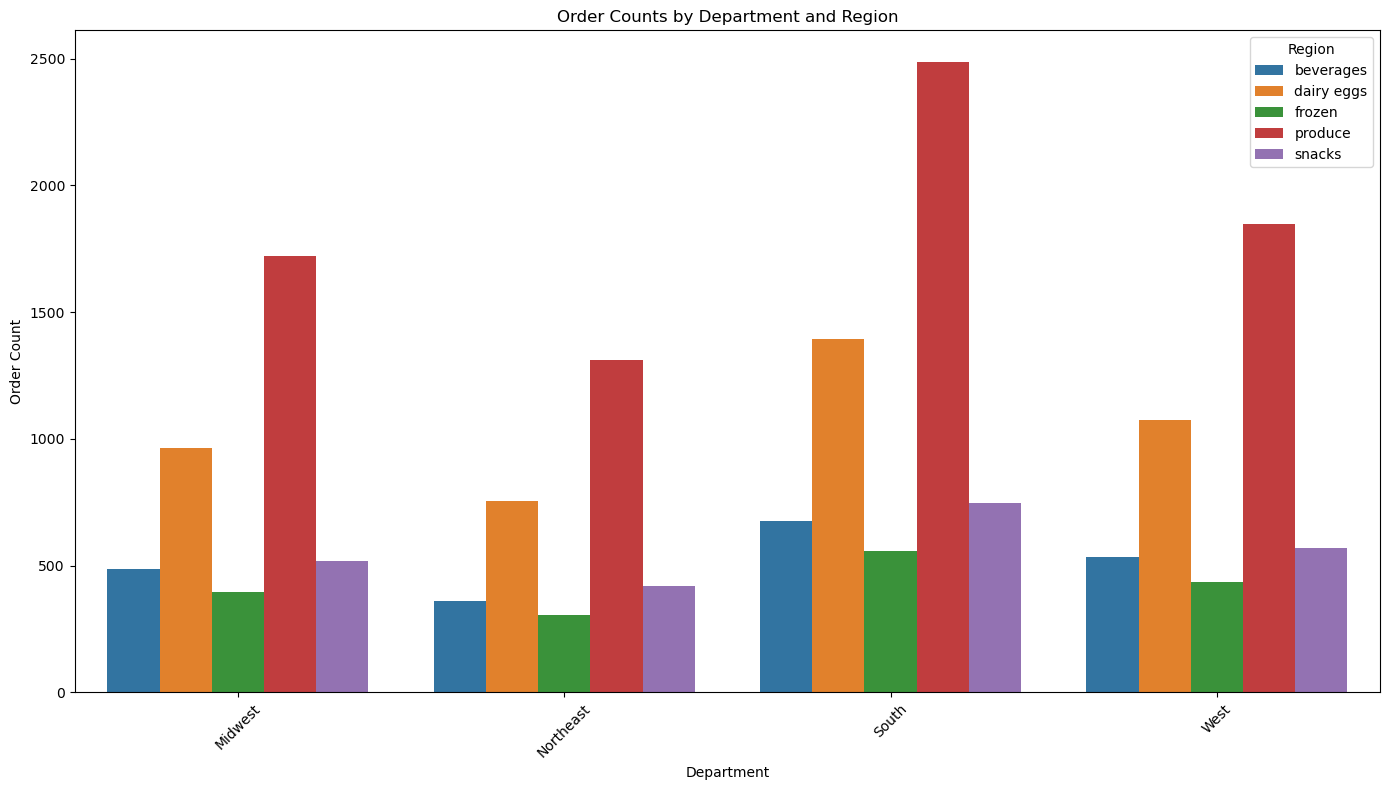

In [65]:
# Filter top departments to keep the plot clean 
top_departments = profile_region_dept.groupby('department_name')['order_count'].sum().sort_values(ascending=False).head(5).index
filtered_df = profile_region_dept[profile_region_dept['department_name'].isin(top_departments)]

department_region= plt.figure(figsize=(14,8))
sns.barplot(
    data=filtered_df,
    x='region',
    y='order_count',
    hue='department_name',
    ci=None
)
plt.title('Order Counts by Department and Region')
plt.xlabel('Department')
plt.ylabel('Order Count')
plt.legend(title='Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [66]:
## Exporting the chart outside of Jupyter in the form of an image file.
department_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department_region.png'))

C:\Users\Sreelaya Narla\AppData\Local\Temp\ipykernel_8708\2128362797.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


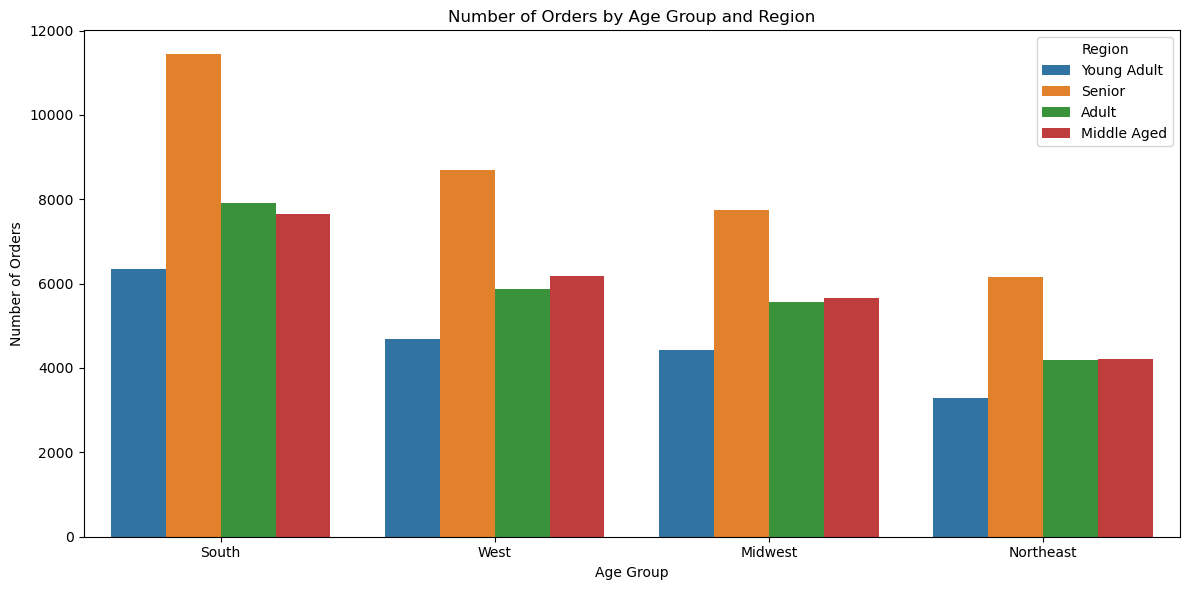

In [67]:
age_region= plt.figure(figsize=(12,6))
sns.barplot(
    data=sampled_df,
    x='region',
    y='order_id',  # or 'order_count' if you have pre-aggregated counts
    hue='age_group',
    estimator=len,  # counts the number of orders per group
    ci=None
)
plt.title('Number of Orders by Age Group and Region')
plt.xlabel('Age Group')
plt.ylabel('Number of Orders')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

In [68]:
## Exporting the chart outside of Jupyter in the form of an image file.
age_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_region.png'))

In [69]:
## Exporting DataFrame
df_active_anonymized.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'dataset_anonymized_final.pkl'))